In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Step 2: Load the dataset
train_df = pd.read_csv('train.csv')

In [13]:
# Display the first few rows of the dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Step 3: Explore the data and check for missing values
print("Dataset Information:")
train_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
# Step 4: Drop columns with a high percentage of missing values
train_df = train_df.drop(['Cabin'], axis=1)

In [17]:
# Step 5: Fill missing values in 'Age' with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [18]:
# Fill missing values in 'Embarked' with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


Text(0.5, 1.0, 'Boxplot of Fare')

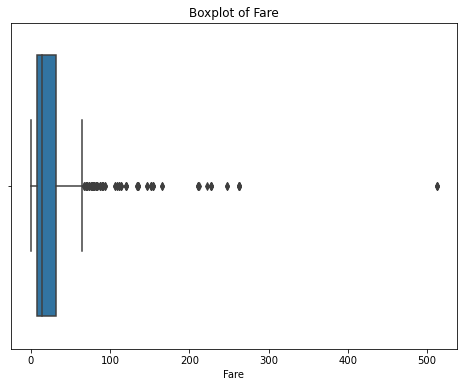

In [19]:
# Step 6: Handle outliers in 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')

In [20]:
# Identify and remove outliers in 'Fare'
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[(train_df['Fare'] >= Q1 - 1.5 * IQR) & (train_df['Fare'] <= Q3 + 1.5 * IQR)]


In [21]:
# Step 7: Verify the changes
print("\nAfter Cleaning:")
print(train_df.info())


After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    object 
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked     775 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 72.7+ KB
None


In [22]:
# Step 8: Save the cleaned dataset
train_df.to_csv('cleaned_train.csv', index=False)